In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
sns.set(style="whitegrid")

In [13]:
data = pd.read_csv(r'C:\Users\Swetha\Downloads\default of credit card clients.csv') 
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [14]:
print(data.info())  # Data types, missing values
print(data.describe())  # Summary statistics for numeric columns

# Step 3: Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [15]:
#Explore demographic variables
print(data.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


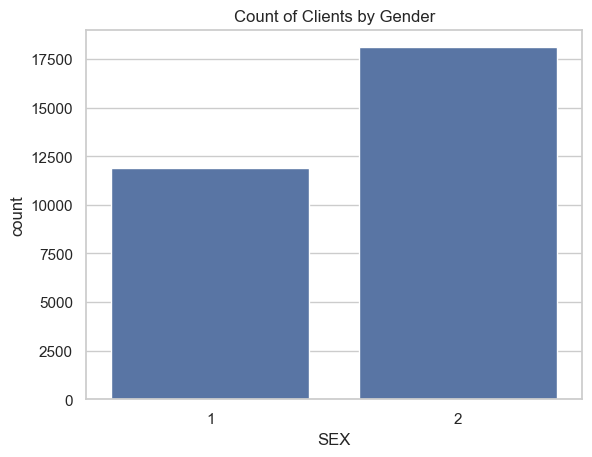

In [16]:
 #Gender
sns.countplot(x='SEX', data=data)
plt.title('Count of Clients by Gender')
plt.show()

In [17]:
#Inference: 1 is Male, and 2 is Female
#Out of 30,000 clients, (60.4%) are female and (39.6%) are male.
#This indicates that female clients form the majority of credit card holders in the dataset.

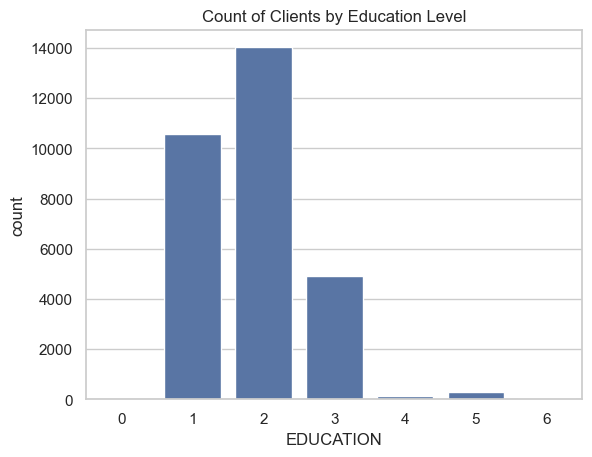

In [18]:
# Education
sns.countplot(x='EDUCATION', data=data)
plt.title('Count of Clients by Education Level')
plt.show()

In [19]:
#inference: (1 = Graduate school ,2 = University , 3 = High school, 4 = Others)
#Most clients belong to University education , followed by Graduate school.
#Very few clients fall into unknown or lower education categories.
#This suggests that credit card usage is concentrated among individuals with higher educational attainment

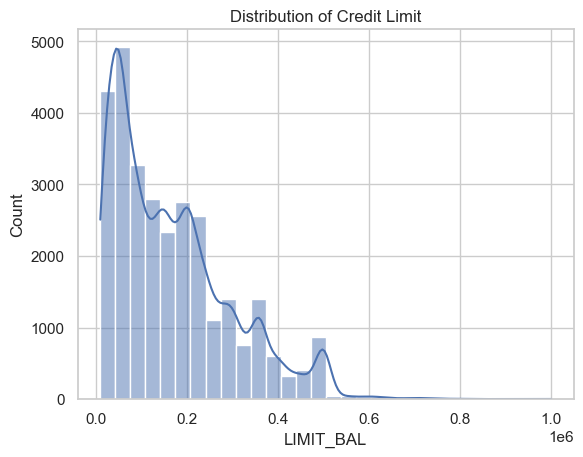

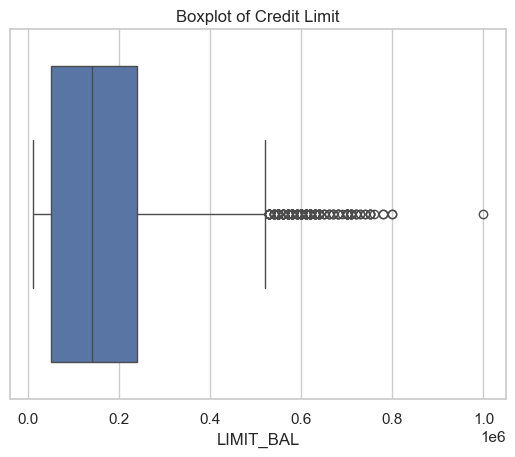

In [20]:
 #Explore credit limit
sns.histplot(data['LIMIT_BAL'], kde=True, bins=30)
plt.title('Distribution of Credit Limit')
plt.show()

sns.boxplot(x=data['LIMIT_BAL'])
plt.title('Boxplot of Credit Limit')
plt.show()

In [21]:
#inference:Credit Limit Distribution
#Credit limits range from ₹10,000 to ₹10,00,000.
#The median credit limit  with 50% of clients having limits between ₹50,000 and ₹2,40,000.
#The distribution is right-skewed, indicating that while most clients have moderate limits, a few have very high limits.

#inference:
#The boxplot shows multiple high-end outliers, with some clients having credit limits close to ₹10,00,000.
#This confirms unequal credit allocation, where a small group of clients receives significantly higher credit limits.

           BILL_AMT1      BILL_AMT2     BILL_AMT3      BILL_AMT4  \
count   30000.000000   30000.000000  3.000000e+04   30000.000000   
mean    51223.330900   49179.075167  4.701315e+04   43262.948967   
std     73635.860576   71173.768783  6.934939e+04   64332.856134   
min   -165580.000000  -69777.000000 -1.572640e+05 -170000.000000   
25%      3558.750000    2984.750000  2.666250e+03    2326.750000   
50%     22381.500000   21200.000000  2.008850e+04   19052.000000   
75%     67091.000000   64006.250000  6.016475e+04   54506.000000   
max    964511.000000  983931.000000  1.664089e+06  891586.000000   

           BILL_AMT5      BILL_AMT6       PAY_AMT1      PAY_AMT2  \
count   30000.000000   30000.000000   30000.000000  3.000000e+04   
mean    40311.400967   38871.760400    5663.580500  5.921163e+03   
std     60797.155770   59554.107537   16563.280354  2.304087e+04   
min    -81334.000000 -339603.000000       0.000000  0.000000e+00   
25%      1763.000000    1256.000000    1000.000

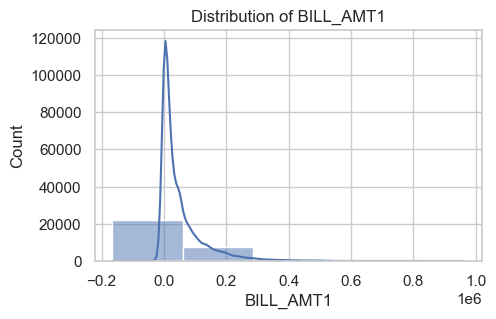

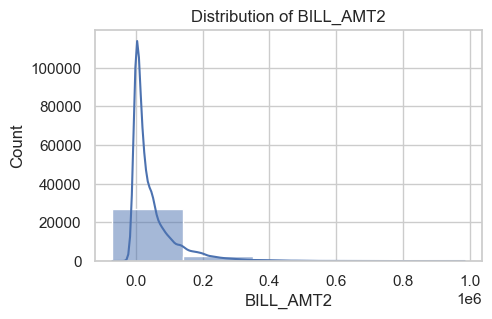

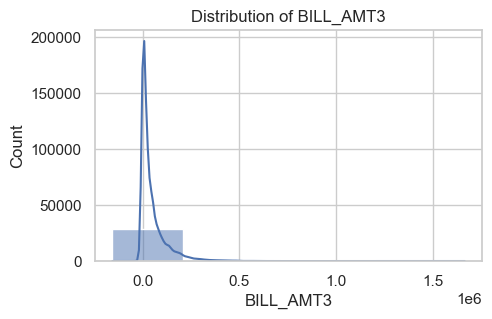

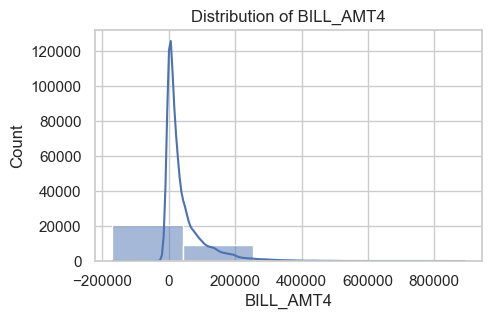

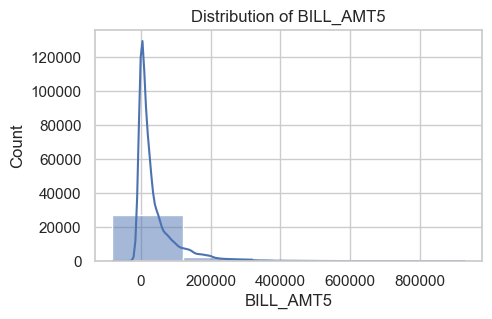

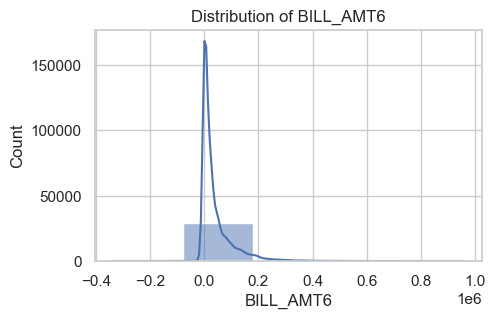

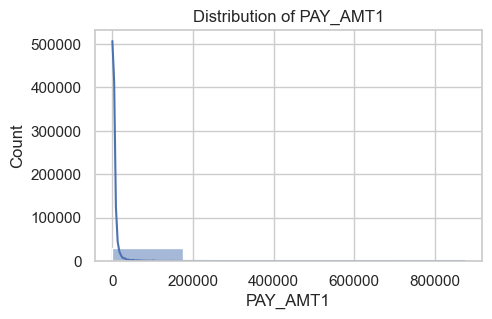

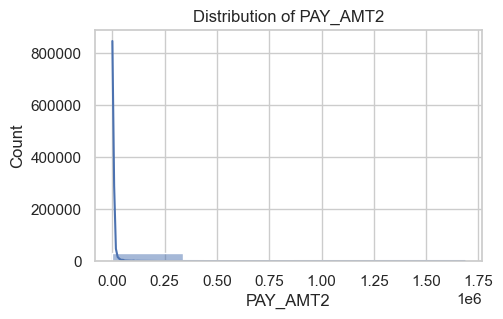

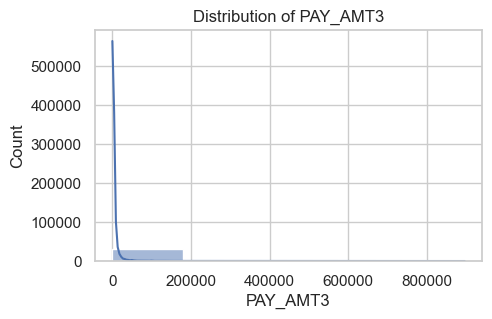

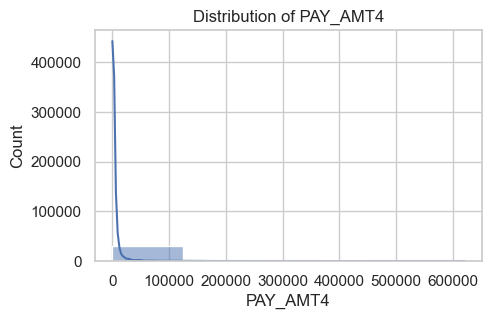

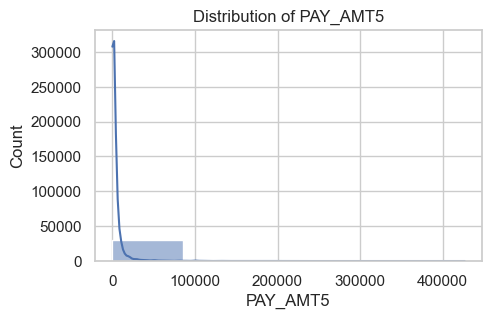

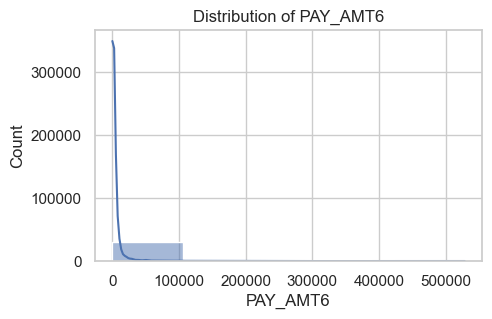

In [22]:
# Explore billing amounts and repayment amounts (Example: last month)
numeric_cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

# Summary statistics
print(data[numeric_cols].describe())

# Histograms for bills and payments
for col in numeric_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(data[col], bins=5, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

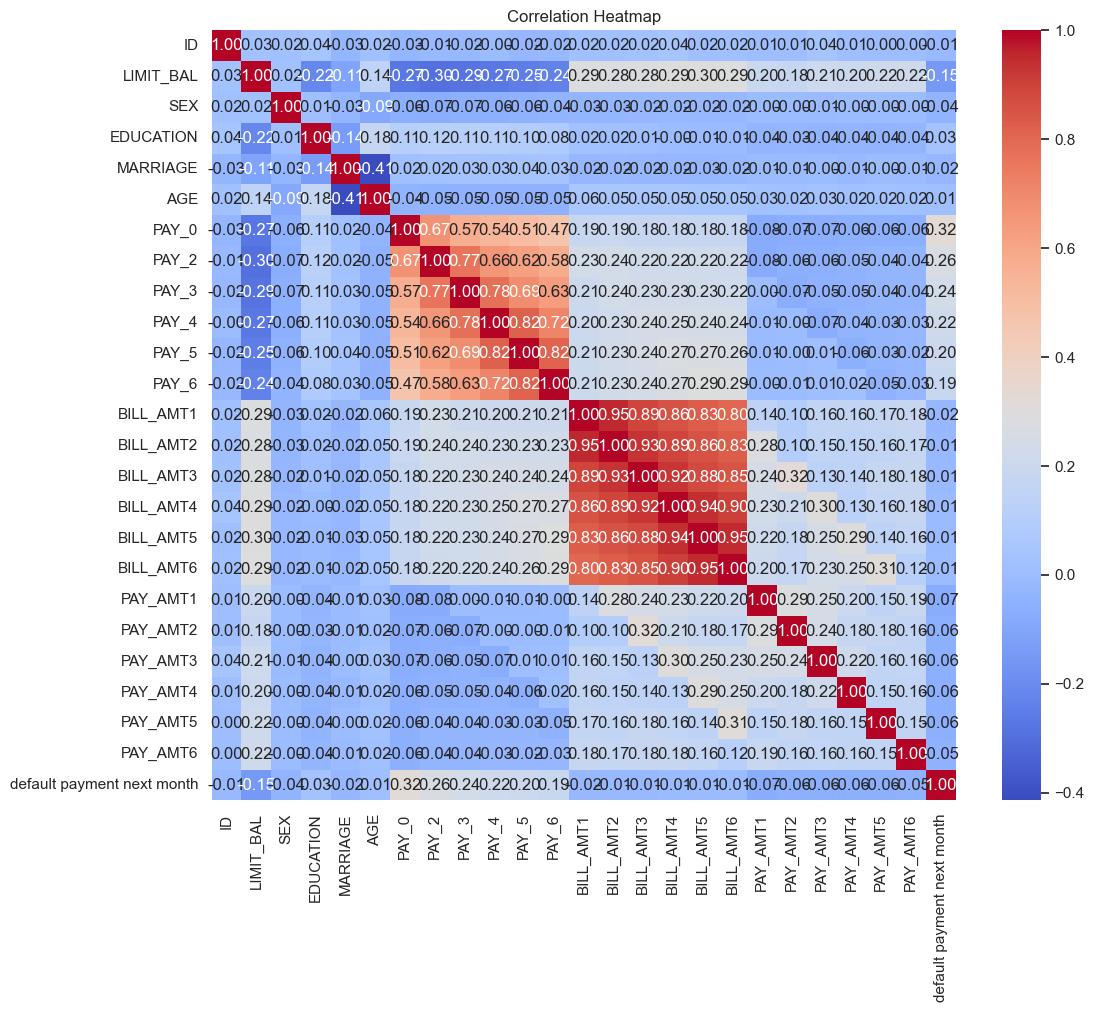

In [24]:
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#inference:

#Strong positive correlations exist among billing amounts across months, indicating consistent spending behavior.
#Repayment variables are also positively correlated, suggesting stable repayment patterns over time.
#Credit limit shows a positive relationship with billing amounts, meaning higher credit limits are associated with higher spending.

In [ ]:
#FINAL INFERENCE
#The exploratory analysis reveals that the dataset consists predominantly of working-age, well-educated clients, with females forming the majority of credit card holders. 
#Credit limits, billing amounts, and repayment valuesshow wide variability and strong right-skewness, indicating heterogeneous financial behavior among clients. 
#While most clients maintain moderate credit limits and balances, a small proportion exhibit very high credit usage and repayments.
#These patterns highlight substantial diversity in credit utilization and repayment behavior, providing a strong foundation for further analysis of credit card default risk.